<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab04/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noduri: ['A1', 'A2', 'A3', 'A4', 'A5']
Muchii: [('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')]


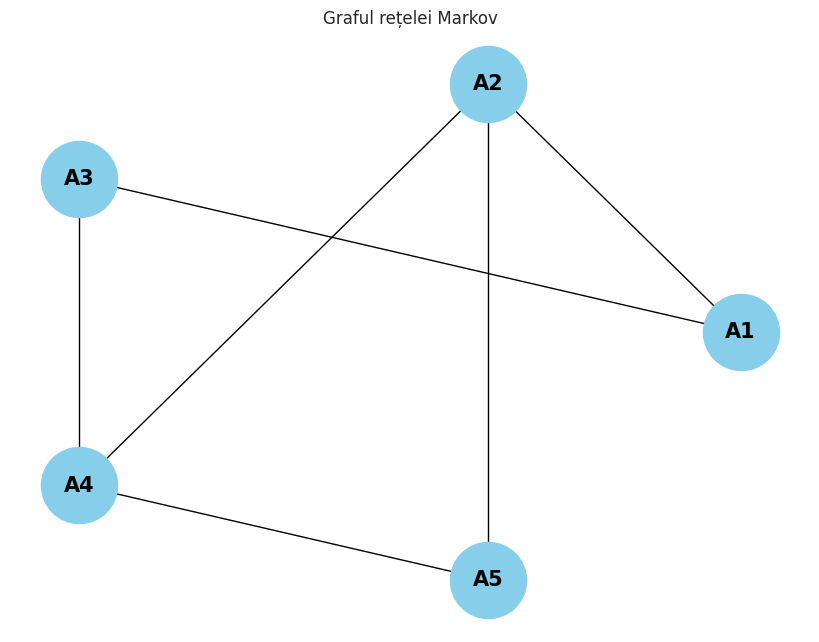

Clicile din rețea: [['A4', 'A2', 'A5'], ['A4', 'A3'], ['A1', 'A2'], ['A1', 'A3']]
Stările de probabilitate maximă pentru variabilele A1, A2, A3, A4, A5:
{'A1': 0, 'A2': 1, 'A3': 1, 'A4': 0, 'A5': 0}


In [14]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

model = MarkovNetwork()
edges = [("A1", "A2"), ("A1", "A3"), ("A2", "A4"), ("A2", "A5"), ("A3", "A4"), ("A4", "A5")]
model.add_edges_from(edges)

print("Noduri:", model.nodes())
print("Muchii:", model.edges())

pos = nx.circular_layout(model)
plt.figure(figsize=(8, 6))
nx.draw(model, pos=pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold")
plt.title("Graful rețelei Markov")
plt.show()

cliques = list(nx.find_cliques(model.to_undirected()))
print("Clicile din rețea:", cliques)

factor_A1_A2 = DiscreteFactor(variables=['A1', 'A2'], cardinality=[2, 2], values=[1, np.exp(0.5), np.exp(0.5), 1])
factor_A1_A3 = DiscreteFactor(variables=['A1', 'A3'], cardinality=[2, 2], values=[1, np.exp(0.5), np.exp(0.5), 1])
factor_A2_A4 = DiscreteFactor(variables=['A2', 'A4'], cardinality=[2, 2], values=[1, np.exp(0.5), np.exp(0.5), 1])
factor_A2_A5 = DiscreteFactor(variables=['A2', 'A5'], cardinality=[2, 2], values=[1, np.exp(0.5), np.exp(0.5), 1])
factor_A3_A4 = DiscreteFactor(variables=['A3', 'A4'], cardinality=[2, 2], values=[1, np.exp(0.5), np.exp(0.5), 1])
factor_A4_A5 = DiscreteFactor(variables=['A4', 'A5'], cardinality=[2, 2], values=[1, np.exp(0.5), np.exp(0.5), 1])


model.add_factors(factor_A1_A2, factor_A1_A3, factor_A2_A4, factor_A2_A5, factor_A3_A4, factor_A4_A5)


inference = BeliefPropagation(model)
result = inference.map_query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])
print("Stările de probabilitate maximă pentru variabilele A1, A2, A3, A4, A5:")
print(result)
